In [70]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler
import matplotlib.pyplot as plt

In [30]:
data = pd.read_csv("letter-recognition.csv")
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [55]:
y = data.iloc[:, 0]
X = data.iloc[:, 1:]

In [56]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
lb = LabelBinarizer()
y_bin = lb.fit_transform(y)

In [59]:
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)
y_train_labels = lb.inverse_transform(y_train_bin)
y_test_labels = lb.inverse_transform(y_test_bin)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
rbf_model = SVC(kernel='rbf', probability = True)
rbf_model.fit(X_train, y_train)

SVC(probability=True)

In [61]:
rbf_model.score(X_test,y_test)

0.95

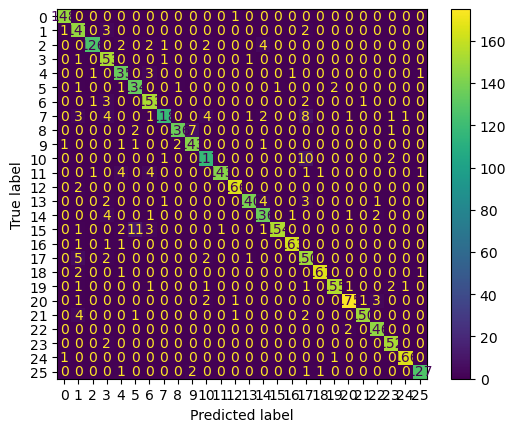

In [68]:
y_pred = rbf_model.predict(X_test)
y_score = rbf_model.predict_proba(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       149
         1.0       0.87      0.96      0.91       153
         2.0       0.98      0.92      0.95       137
         3.0       0.88      0.98      0.93       156
         4.0       0.91      0.96      0.93       141
         5.0       0.90      0.96      0.93       140
         6.0       0.91      0.96      0.93       160
         7.0       0.97      0.82      0.89       144
         8.0       0.98      0.93      0.95       146
         9.0       0.94      0.96      0.95       149
        10.0       0.91      0.90      0.91       130
        11.0       0.99      0.92      0.96       155
        12.0       0.98      0.99      0.99       168
        13.0       0.98      0.93      0.95       151
        14.0       0.92      0.94      0.93       145
        15.0       0.99      0.89      0.94       173
        16.0       0.99      0.98      0.98       166
        17.0       0.83    

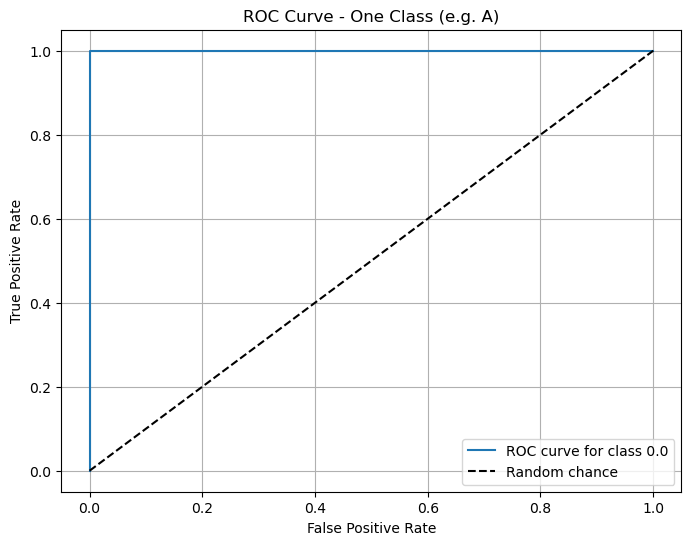

In [71]:
class_index = 0  # A = 0, B = 1, ...
fpr, tpr, _ = roc_curve(y_test_bin[:, class_index], y_score[:, class_index])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve for class {lb.classes_[class_index]}')
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - One Class (e.g. A)')
plt.legend()
plt.grid(True)
plt.show()

In [72]:
linear_model = SVC(kernel='linear', probability = True)
linear_model.fit(X_train,y_train)

SVC(kernel='linear', probability=True)

In [73]:
linear_model.score(X_test,y_test)

0.85825

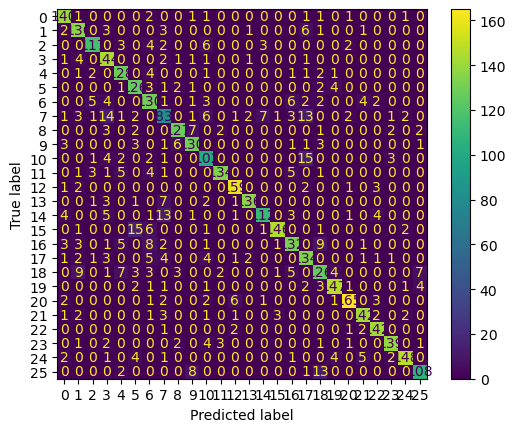

In [74]:
y_pred = linear_model.predict(X_test)
y_score = rbf_model.predict_proba(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       149
         1.0       0.82      0.89      0.85       153
         2.0       0.89      0.85      0.87       137
         3.0       0.76      0.92      0.83       156
         4.0       0.83      0.91      0.87       141
         5.0       0.80      0.90      0.85       140
         6.0       0.74      0.81      0.78       160
         7.0       0.64      0.58      0.61       144
         8.0       0.90      0.87      0.89       146
         9.0       0.86      0.87      0.87       149
        10.0       0.75      0.78      0.77       130
        11.0       0.95      0.86      0.91       155
        12.0       0.92      0.95      0.94       168
        13.0       0.96      0.90      0.93       151
        14.0       0.90      0.77      0.83       145
        15.0       0.96      0.84      0.90       173
        16.0       0.84      0.80      0.82       166
        17.0       0.75    

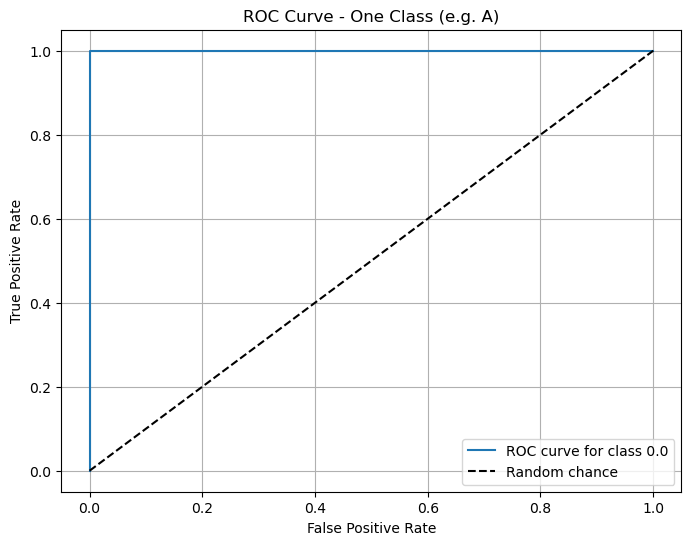

In [76]:
class_index = 0  # A = 0, B = 1, ...
fpr, tpr, _ = roc_curve(y_test_bin[:, class_index], y_score[:, class_index])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve for class {lb.classes_[class_index]}')
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - One Class (e.g. A)')
plt.legend()
plt.grid(True)
plt.show()